In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_ctrUa4K.csv")
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

In [4]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.drop(["Gender","Married"],axis=1,inplace=True)

In [7]:
df.isnull().sum()

Loan_ID               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.duplicated().sum()

0

In [10]:
col = [ 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

for i in col:
    print(df[i].unique())
    print("_+"*20)

['1' '0' '2' '3+']
_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+
['Graduate' 'Not Graduate']
_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+
['No' 'Yes']
_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+
[360. 120. 180.  60. 300. 480. 240.  36.  84.]
_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+
[1. 0.]
_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+
['Rural' 'Urban' 'Semiurban']
_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+
['N' 'Y']
_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+


In [11]:
df["Education"] = df["Education"].map({'Graduate':1, 'Not Graduate':0})

df["Dependents"] = df["Dependents"].map({"0":0,"1":1, "2":2, "3+":3})

df["Self_Employed"] = df["Self_Employed"].map({'Yes':1, 'No':0})

df["Property_Area"] = df["Property_Area"].map({'Rural':0, 'Urban':1, "Semiurban":2})

df["Loan_Status"] = df["Loan_Status"].map({'Y':1, 'N':0})


In [12]:
df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


<AxesSubplot:>

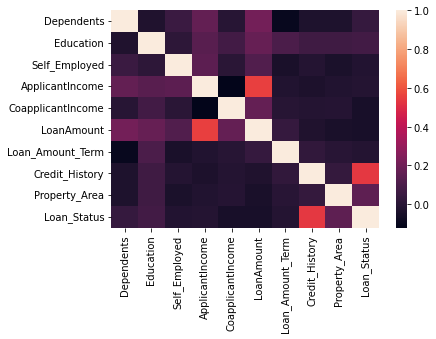

In [13]:
sns.heatmap(df.corr())

In [14]:
X = df.iloc[:,1:-1]

y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=5, stratify=y)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((344, 9), (148, 9), (344,), (148,))

In [47]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred = rf.predict(X_test)

In [49]:
print(accuracy_score(y_pred, y_test))

0.8040540540540541


In [30]:
gb = GaussianNB()

gb.fit(X_train,y_train)

GaussianNB()

In [31]:
y_gb_pre = gb.predict(X_test)

In [32]:
print(accuracy_score(y_gb_pre, y_test))

0.7972972972972973


In [33]:
dc = DecisionTreeClassifier()

dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_dc_pred = dc.predict(X_test)

In [35]:
print(accuracy_score(y_dc_pred, y_test))

0.75


In [44]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [ ]:
model = SVC(kernel='poly',probability=True)
pipe = Pipeline([ ('SVC', model)])
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)
params = {'SVC__C': np.linspace(0.001,6,20),
          'SVC__degree':[2,3,4]}
gcv = GridSearchCV(pipe,scoring='roc_auc',cv=kfold,param_grid=params)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)
